In [2]:
import numpy as np 
import pandas as pd
from matplotlib import cm as cm
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
import matplotlib.pyplot as plt

df=pd.read_csv("final.csv")
dataset=df[df.STATE=='MAHARASHTRA']
AT=dataset['AvgTemp']
Prep=dataset['Precipitation']
PE=dataset['PotentialEvapTran']
VP=dataset['VapourPres']
WDf=dataset['WetDayFreq']

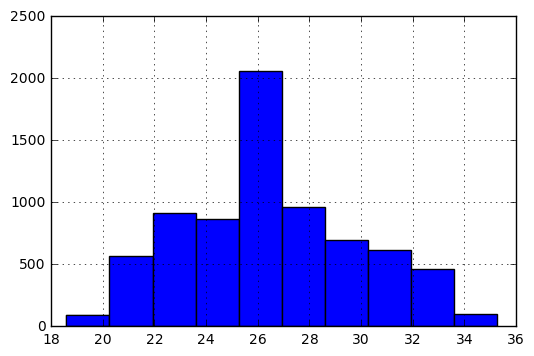

In [3]:
AT.hist()
plt.show()

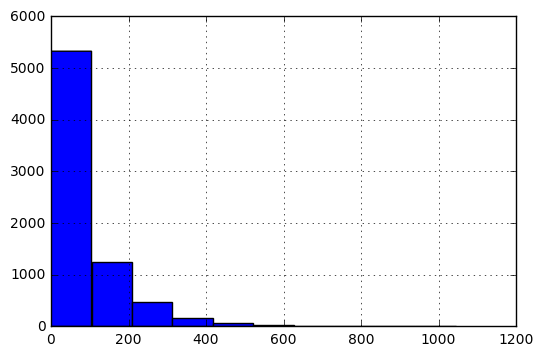

In [4]:
Prep.hist()
plt.show()

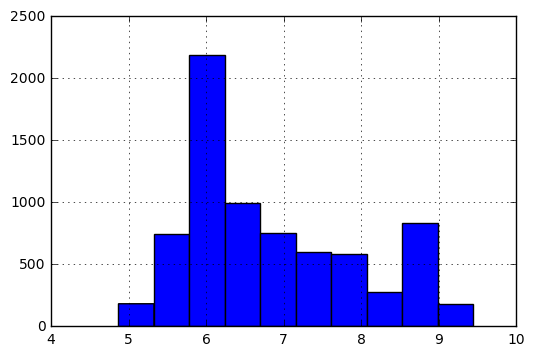

In [5]:
PE.hist()
plt.show()

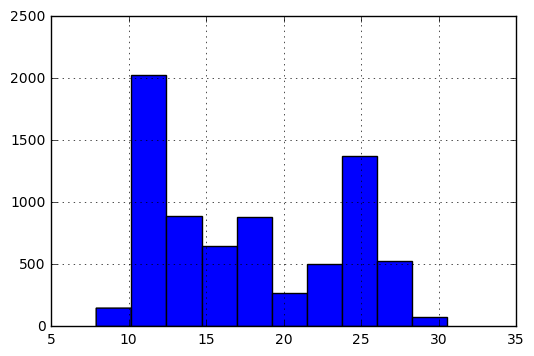

In [6]:
VP.hist()
plt.show()

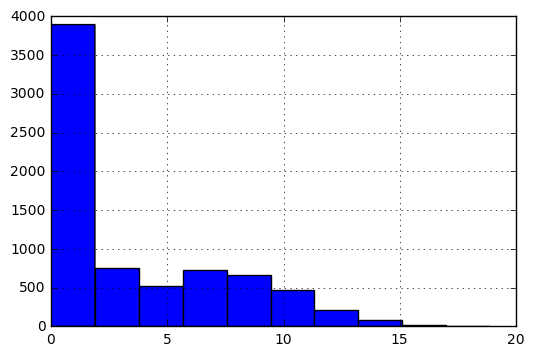

In [7]:
WDf.hist()
plt.show()

In [8]:
corr=dataset.corr(method='pearson')
print(corr)

                    AvgTemp      YEAR  PotentialEvapTran  Precipitation  \
AvgTemp            1.000000  0.036346           0.735072       0.056542   
YEAR               0.036346  1.000000          -0.000529      -0.031516   
PotentialEvapTran  0.735072 -0.000529           1.000000      -0.428653   
Precipitation      0.056542 -0.031516          -0.428653       1.000000   
SPI               -0.078419 -0.111662          -0.023840       0.218509   
VapourPres         0.373849  0.016922          -0.225059       0.701905   
WetDayFreq         0.111120 -0.014948          -0.464729       0.896751   
CLASS              0.036921  0.036215           0.037367      -0.115855   

                        SPI  VapourPres  WetDayFreq     CLASS  
AvgTemp           -0.078419    0.373849    0.111120  0.036921  
YEAR              -0.111662    0.016922   -0.014948  0.036215  
PotentialEvapTran -0.023840   -0.225059   -0.464729  0.037367  
Precipitation      0.218509    0.701905    0.896751 -0.115855  
SPI 

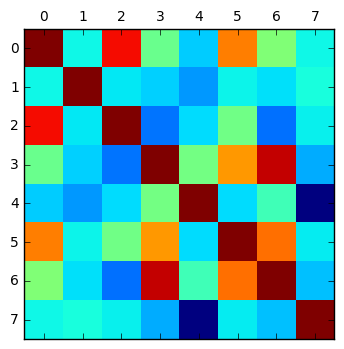

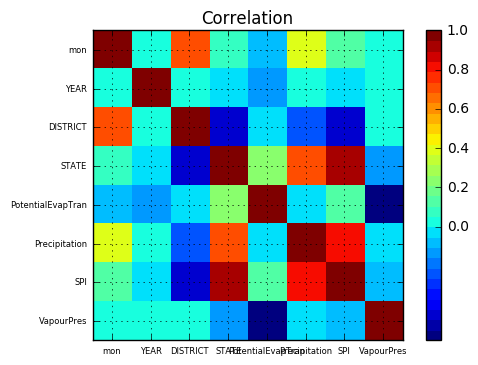

In [9]:
plt.matshow(df.corr())
plt.show()
"""names=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
fig=plt.figure()
ax=fig.add_subplot(111)
cax = ax.matshow(corr, vmin=-1, vmax=1)
fig.colorbar(cax)
ticks = np.arange(0,11,1)
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(names)
ax.set_yticklabels(names)
plt.show()
"""
def correlation_matrix(df):
    
    

    fig = plt.figure()
    ax1 = fig.add_subplot(111)
    cmap = cm.get_cmap('jet', 30)
    cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
    ax1.grid(True)
    plt.title('Correlation')
    labels=['AvgTemp', 'mon', 'YEAR', 'DISTRICT', 'STATE', 'PotentialEvapTran',
       'Precipitation', 'SPI', 'VapourPres', 'WetDayFreq', 'CLASS']
    ax1.set_xticklabels(labels,fontsize=6)
    ax1.set_yticklabels(labels,fontsize=6)
    # Add colorbar, make sure to specify tick locations to match desired ticklabels
    fig.colorbar(cax, ticks=[0.0,.2,.4,.6,.8,1])
    plt.show()

correlation_matrix(dataset)

In [10]:

X=dataset.iloc[:,[0,1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values
labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])

In [11]:
X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

In [12]:
classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
acc=classifier.score(X_test,y_test)
print(classifier.score(X_test,y_test))

0.878148400272


In [13]:
#excluding now avg temp 
X=dataset.iloc[:,[1,3,4,5,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.878148400272
0.863172226004
-1.70542635659


In [14]:
#excluding PE
X=dataset.iloc[:,[0,1,3,4,6,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.878148400272
0.863852961198
-1.62790697674


In [15]:
#excluding Precipitation
X=dataset.iloc[:,[0,1,3,4,5,8,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)
print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.878148400272
0.864533696392
-1.5503875969


In [16]:
#excluding VP
X=dataset.iloc[:,[0,1,3,4,5,6,9]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.878148400272
0.859768550034
-2.09302325581


In [17]:
#excluding WD
X=dataset.iloc[:,[0,1,3,4,5,6,8]].values
Y=dataset.iloc[:,10].values

labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.878148400272
0.878829135466
0.077519379845


In [18]:
#single featured: avg temp
X=dataset.iloc[:,[0]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,1]=labelen1.fit_transform(X[:,1])
X[:,2]=labelen2.fit_transform(X[:,2])
X[:,3]=labelen3.fit_transform(X[:,3])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.878148400272
0.88291354663
0.542635658915


In [19]:
#single featured: PE
X=dataset.iloc[:,[5]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)

0.878148400272
0.918992511913
4.6511627907


In [20]:
#single featured: Precipitation
X=dataset.iloc[:,[6]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.878148400272
0.874744724302
-0.387596899225


In [21]:
#single featured: VP
X=dataset.iloc[:,[8]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()

X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)


0.878148400272
0.891082368958
1.47286821705


In [22]:
#single featured: WDF
X=dataset.iloc[:,[9]].values
Y=dataset.iloc[:,10].values

"""labelen1=LabelEncoder()
labelen2=LabelEncoder()
labelen3=LabelEncoder()


X[:,0]=labelen1.fit_transform(X[:,0])
X[:,1]=labelen2.fit_transform(X[:,1])
X[:,2]=labelen3.fit_transform(X[:,2])
#X[:,4]=labelencoder_X.fit_transform(X[:,4])
"""


X_train, X_test, y_train, y_test =train_test_split(X,Y, test_size=0.2,random_state=0)

classifier= DecisionTreeClassifier(criterion='entropy',random_state=0)
classifier.fit(X_train, y_train)

y_pred=classifier.predict(X_test)

print(acc)
print(classifier.score(X_test,y_test))
print(((classifier.score(X_test,y_test)-acc)/acc)*100)



0.878148400272
0.88291354663
0.542635658915
